In [1]:
import numpy as np
import matplotlib.pyplot as plt

### This notebook is meant to demonstrate the implementation of Ridge Regression and does not prove or claim the superioirity of Ridge Regression over Linear Regression, at least for this data

In [2]:
np.random.seed(10)
X = np.random.rand(1000, 1)*16 - 10
y = 0.1*(X**3) + (X**2) + np.random.rand(1000, 1)*20

Text(0, 0.5, 'y (output)')

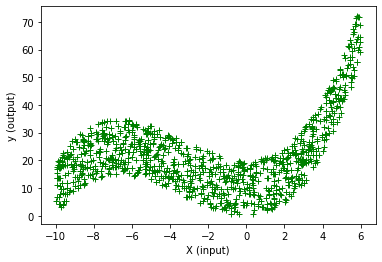

In [3]:
# Plotting X vs y
plt.plot(X, y, '+', color='green')
plt.xlabel("X (input)")
plt.ylabel("y (output)")

In [4]:
X = np.hstack((np.ones((X.shape[0], 1)), X))

In [5]:
X_train = X[:int(-0.2*len(X)), :]
X_test = X[int(-0.2*len(X)):, :]
print("X_train.shape =", X_train.shape)
print("X_test =", X_test.shape)
y_train = y[:int(-0.2*len(y))]
y_test = y[int(-0.2*len(y)):]
print("y_train.shape =", y_train.shape)
print("y_test.shape =", y_test.shape)

X_train.shape = (800, 2)
X_test = (200, 2)
y_train.shape = (800, 1)
y_test.shape = (200, 1)


### **Linear Regression without regularization**

In [6]:
def hypothesis(X, theta):
    #            (m, 4) , (4, 1)
    return np.dot(X, theta)

In [7]:
def cost_function(X, y, theta):
    m = X.shape[0]
    h = hypothesis(X, theta)
    return ((h-y).T.dot(h-y))[0][0]/m

In [8]:
def gradient(X, y, theta):
    m = X.shape[0]
    h = hypothesis(X, theta)
    return X.T @ (h-y)

In [9]:
def closed_solution(X, y):
    return (np.linalg.inv(X.T.dot(X))).dot(X.T.dot(y))

In [10]:
def gradient_descent(X, y, learning_rate=0.001, epochs=100):
    m = X.shape[0]
    theta = np.zeros((X.shape[1], 1))
    errors = []
    iters = []
    for i in range(1, epochs+1):
        grad = gradient(X, y, theta)
        theta = theta - ((learning_rate)/m) * grad
        new_cost = cost_function(X, y, theta)
        iters.append(i)
        errors.append(new_cost)
#     plt.plot(iters, errors)
    return theta, new_cost

In [11]:
theta_updated, new_cost = gradient_descent(X_train, y_train, 0.0725, 400)
print(new_cost)

141.87319965133796


Cost on train set = 141.87319965133796


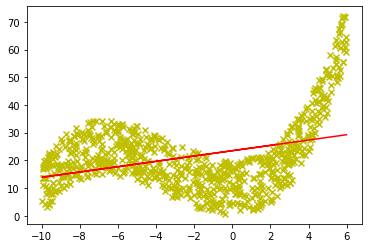

In [12]:
plt.scatter(X_train[:, 1], y_train, color='y', marker='x')
plt.plot(X_train[:, 1], hypothesis(X_train, theta_updated), color='red')
print("Cost on train set =", cost_function(X_train, y_train, theta_updated))

Cost on test set = 156.06451364874522


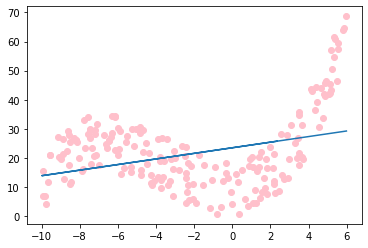

In [13]:
plt.scatter(X_test[:, 1], y_test, color='pink')
plt.plot(X_train[:, 1], hypothesis(X_train, theta_updated))
print("Cost on test set =", cost_function(X_test, y_test, theta_updated))

##### To confirm this, let's plot the learning curve for the Linear Regression model (Univariate)

In [14]:
def learning_curve(X_train, y_train, X_test, y_test, size=100):
    train_costs = []
    test_costs = []
    m_s = np.arange(1,size+1)
    for i in range(1, size+1):
        train_theta, train_cost = gradient_descent(X_train[:i, :], y_train[:i, :], 0.01, 200)
        train_costs.append(train_cost)
        test_costs.append(cost_function(X_test[:, :], y_test, train_theta))
    plt.plot(m_s, train_costs, 'r')
    plt.plot(m_s, test_costs, 'b')  
    plt.xlabel('Examples')
    plt.ylabel('MSE (Mean Squared Error)')

Text(0.5, 1.0, 'Learning curve of Linear Model')

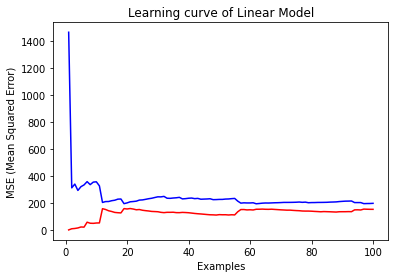

In [15]:
learning_curve(X_train, y_train, X_test, y_test, 100)
plt.title("Learning curve of Linear Model")

### **Ridge Regression (Regularized Linear Regression)**

In [16]:
def cost_function_ridge(X, y, theta, lam):
    m = X.shape[0]
    h = hypothesis(X, theta)
    return ( ((h-y).T.dot(h-y))[0][0] )/m + ( lam * theta.T.dot(theta)[0][0] )/m

In [17]:
def gradient_ridge(X, y, theta, lam):
    m = X.shape[0]
    h = hypothesis(X, theta)
    return (2*X.T.dot(h-y) + (2 * lam * theta))/m

In [18]:
def close_solution(X, y, lam):
    return (  np.linalg.inv(X.T.dot(X) + lam*np.eye(X.shape[1]))  ).dot(X.T.dot(y))

In [19]:
def gradient_descent_ridge(X, y, learning_rate=0.001, epochs=100, lam=1.0):
    m = X.shape[0]
    theta = np.zeros((X.shape[1], 1))
    errors = []
    iters = []
    for i in range(1, epochs+1):
        grad = gradient_ridge(X, y, theta, lam)
        theta = theta - ((learning_rate)) * grad
        new_cost = cost_function_ridge(X, y, theta, lam)
        iters.append(i)
        errors.append(new_cost)
#     plt.plot(iters, errors)
    return theta, new_cost

Using Gradient Descent Optimization on Train Set with the ridge penalty

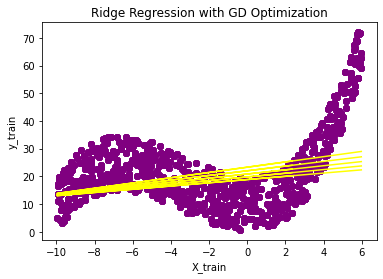

In [20]:
for i in np.arange(0.0, 200, 40):
    ridge_theta, ridge_cost = gradient_descent_ridge(X_train, y_train, learning_rate=0.03, lam=i)    
    plt.scatter(X_train[:,1], y_train, color='purple')
    plt.plot(X_train[:, 1], hypothesis(X_train, ridge_theta), color='yellow')
    plt.xlabel('X_train')
    plt.ylabel('y_train')    
    plt.title('Ridge Regression with GD Optimization')

Closed Form on Train Set with the ridge penalty

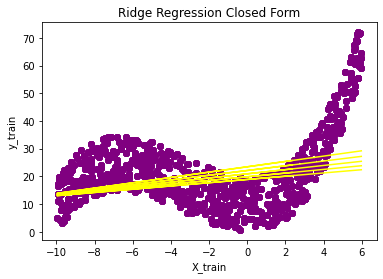

In [21]:
for i in np.arange(0.0, 200, 40):
    closed_theta = close_solution(X_train, y_train, i)
    plt.scatter(X_train[:,1], y_train, color='purple')
    plt.plot(X_train[:, 1], hypothesis(X_train, closed_theta), color='yellow')
    plt.xlabel('X_train')
    plt.ylabel('y_train')    
    plt.title('Ridge Regression Closed Form')

Gradient Descent Optimization on Test Set with the ridge penalty

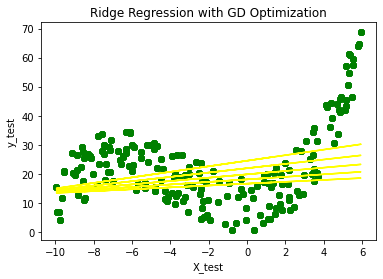

In [22]:
for i in np.arange(0.0, 100, 20):
    ridge_theta_test, ridge_theta_cost = gradient_descent_ridge(X_test, y_test, 0.03, lam=i)
    plt.scatter(X_test[:,1], y_test, color='green')
    plt.plot(X_test[:, 1], hypothesis(X_test, ridge_theta_test), color='yellow')
    plt.xlabel('X_test')
    plt.ylabel('y_test')  
    plt.title('Ridge Regression with GD Optimization')

In [23]:
print('The MSE for the test set when Lambda = 10:\nError =', cost_function_ridge(X_test, y_test, ridge_theta_test, lam=10))

The MSE for the test set when Lambda = 10:
Error = 222.1540322971715
